## Generating an STL From a Digital Elevation Map for 3D Printing

3D printing enables the creation of 3D topological maps fairly rapidly and reliably based on elevation data. I was interested in creating a topological map for the surface of Mars based on satellite measurements, and wanted to do so with a flat projection. Whereas I could find .stl models online for spherical models of mars including elevation measurements such as [this one](http://www.thingiverse.com/thing:26311), I could not find any models or simple methods for creating such a projected topological map, so I decided to try to work out how to build the model in python given a digital elevation map image.

The code that I wrote for creating this STL file lives in `printing_3d.ElevationModel`:

In [1]:
%matplotlib inline

import sys
sys.path.insert(0, '..')

from printing_3d import ElevationModel

This object performs the construction of such an elevation model, which depends on the `numpy-stl` package which facilitates translation between `.stl` files and `numpy` in python. In order to build the model I take a series of steps:

- `load`: Load the image into a numpy array
- `reduce_resolution`: Reduce the resolution of the image used for the .stl (to avoid filling all of memory with the resulting STL and to avoid attempting to slice a .STL file later that is much more detailed than the print resolution)
- `generate_stl`: Create the STL by building the model object from triangles
    - `generate_surface`: Create the actual elevation surface. Since the image is defined by a square grid, I am taking each adjacent square set of 4 pixels and translating this square into two triangles on the surface. There are multiple ways that we can create a triangle surface given a rectangular array of pixels, but I simply chose one under the assumption that the finest resolution of the .stl will be smaller than the resolution of the printer.
    - `generate_side`: Create a simple flat side for the model. This needs to be performed for each of 4 edges of the image
    - `generate_base`: The base simply consists of 2 triangles to make a rectangle.
- `rescale`: Rescale the resulting model, and if directed add a z-offset of the base.
- `plot`: plot the image
- `plot3D`: plot the resulting STL file in 3D
- `save`: save the resulting STL to file with binary encoding as default (ascii encoded STL's are very large and were the default for `numpy-stl`

Here is an example use case using the digital elevation map `/images/mars.png`:

generating an STL from the digital elevation map: ./images/mars.png
- loading the image from file:                     0.5934s
- generating the surface:                          0.2241s
- generating a side:                               0.0024s
- generating a side:                               0.0018s
- generating a side:                               0.0037s
- generating a side:                               0.0037s
- generating the base:                             0.0000s
- plotting the resulting STL in 3D:                0.0738s
generating an STL from the digital elevation map: ./images/mars.png
- loading the image from file:                     0.6665s
- generating the surface:                          22.4776s
- generating a side:                               0.0185s
- generating a side:                               0.0180s
- generating a side:                               0.0359s
- generating a side:                               0.0367s
- generating the base:               

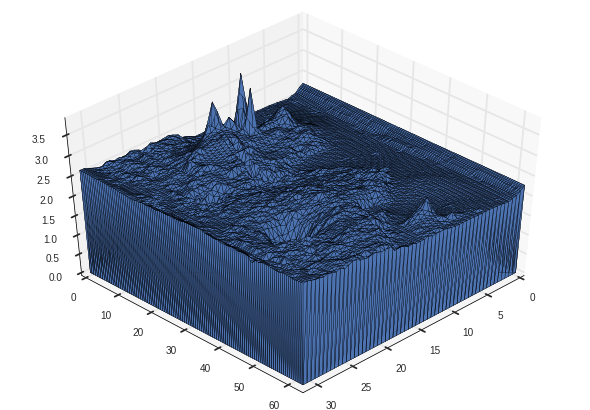

In [2]:
FILENAME = "./images/mars.png"
RADIUS   = 3390000 # m - obtained from Google

em = ElevationModel(FILENAME,           # path to the digital elevation map image
                    radius=RADIUS,      # radius of the planet
                    scale = 10.0/RADIUS,# scale for the STL relative to the planet size
                    zscale=25.0,        # z-scale factor for exaggerating features
                    base=0              # size of elongation of the base
                   )

# generate a low resolution STL for plotting in matplotlib
em.resolution_factor = 50.0
em.generate_stl()
em.plot3d()

# generate a higher resolution STL for 3D printing
em.resolution_factor = 5.0
em.generate_stl()
em.save()

Here is the high resolution image rendered in Makerbot Print, and an image of the initial base being printed on MakerBot Replicator + on the left side of the screenshot.

![](./images/mars_printing_screenshot.png)

Here is the finished product, with images posted on [Thingiverse](http://www.thingiverse.com/thing:2076740). At this size, the resolution of the printing is below that of the full resolution image. However this print is close to the maximum size of the print ing area. Hence, I may want to create a bigger version with full resolution, but I would need to print it in segments.

![](./images/printed_1.jpg)